# Assessment - QM

## Packages

In [91]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from statsmodels.api import OLS
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
# from kneed import KneeLocator
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
%matplotlib inline

## Data processing

In [2]:
# Import data
data=pd.read_csv("https://raw.githubusercontent.com/Sheedy21/QM_assesment/main/data_analysis1.csv",sep=';',low_memory=False)
data.head(3)

,NOMBDEP,NOMBPROV,NOMBDIST,UBIGEO,BUDGET,SEX_M,AGE_66_120,AREA_URB,AREA_RUR,SUBSIDY,CASES_COVID,UBN_1,UBN_2,UBN_3,UBN_4,UBN_5,UBN_6
0,AMAZONAS,CHACHAPOYAS,CHACHAPOYAS,10101,604775.01,1761606,263159,3667060,57540,727320,1953,20.129999,8.96,0.960000,1.35,1.24,1.26
1,AMAZONAS,CHACHAPOYAS,ASUNCION,10102,50000.00,15831,5680,17161,14139,1520,4,94.230003,18.27,0.960000,0.00,0.96,7.69
2,AMAZONAS,CHACHAPOYAS,BALSAS,10103,50000.00,67457,11364,35663,94537,13680,33,67.320000,20.85,23.379999,12.39,1.97,3.38


In [3]:
nomb = ['BUDGET', 'SEX_M', 'AGE_66_120','AREA_URB', 'AREA_RUR', 'SUBSIDY', 
        'CASES_COVID', 'UBN_1', 'UBN_2','UBN_3', 'UBN_4', 'UBN_5','UBN_6']

stat={'Variable':[],'Mean':[],'Std':[],'Min':[],'Median':[],'Max':[]}
for x in nomb:
    s=x
    s1=round(data[x].mean(),1)
    s2=round(data[x].std(),1)
    s3=round(data[x].min(),1)
    s4=round(data[x].median(),1)
    s5='{:010.1f}'.format(round(data[x].max(),1))

    stat['Variable'].append(s)
    stat['Mean'].append(s1)
    stat['Std'].append(s2)
    stat['Min'].append(s3)
    stat['Median'].append(s4)
    stat['Max'].append(s5)
    
pd.DataFrame.from_dict(stat)    


,Variable,Mean,Std,Min,Median,Max
0,BUDGET,263834.5,897018.5,18923.0,112016.0,33083363.1
1,SEX_M,849701.6,2750724.2,8682.0,203567.0,57115496.0
2,AGE_66_120,146354.7,461542.5,3368.0,39851.5,07491042.0
3,AREA_URB,1434395.1,5630307.2,6330.0,142641.5,116075600.0
4,AREA_RUR,306583.4,484395.1,0.0,141796.5,07365775.0
5,SUBSIDY,313607.9,1123621.6,0.0,15200.0,16704040.0
6,CASES_COVID,502.6,2136.1,0.0,26.0,00037000.0
7,UBN_1,65.1,28.8,0.0,75.9,00000099.5
8,UBN_2,16.8,9.6,0.9,14.4,00000072.2
9,UBN_3,11.1,14.4,0.0,6.0,00000098.9


<AxesSubplot:xlabel='UBN_6'>

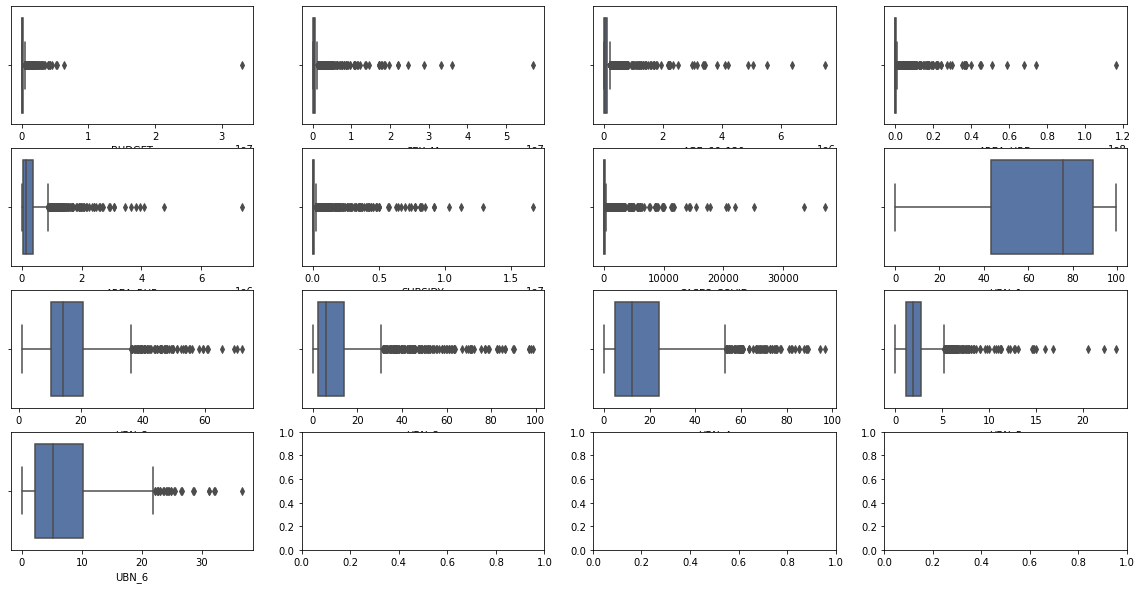

In [4]:
# Boxplots
fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8),(ax9,ax10,ax11,ax12),(ax13,ax14,ax15,ax16)) = plt.subplots(4,4,figsize=(20,10))
sns.set_theme(style="whitegrid")

sns.boxplot(x=data["BUDGET"],ax=ax1)
sns.boxplot(x=data["SEX_M"],ax=ax2)
sns.boxplot(x=data["AGE_66_120"],ax=ax3)
sns.boxplot(x=data["AREA_URB"],ax=ax4)
sns.boxplot(x=data["AREA_RUR"],ax=ax5)
sns.boxplot(x=data["SUBSIDY"],ax=ax6)
sns.boxplot(x=data["CASES_COVID"],ax=ax7)
sns.boxplot(x=data["UBN_1"],ax=ax8)
sns.boxplot(x=data["UBN_2"],ax=ax9)
sns.boxplot(x=data["UBN_3"],ax=ax10)
sns.boxplot(x=data["UBN_4"],ax=ax11)
sns.boxplot(x=data["UBN_5"],ax=ax12)
sns.boxplot(x=data["UBN_6"],ax=ax13)

In [5]:
# Replace outliers using MinMaxScaler
data_m=data.copy()
outliers = [33083363,57115496,6394488,116075600,7365775,16704040,33602,99.48,69.35,96.74,94.71,20.61,31.21]
max = data.quantile(q=0.75) + 1.5*(data.quantile(q=0.75) - data.quantile(q=0.25))

for j in range(4,16):
    for i in range(len(data_m)):
        if data_m.iloc[i,j]>outliers[j - 4]:
            data_m.iloc[i,j]=max[j-4]

In [6]:
# Normality test
Variable=['BUDGET','SEX_M','AGE_66_120','AREA_URB','AREA_RUR',
          'SUBSIDY','CASES_COVID','UBN_1','UBN_2','UBN_3','UBN_4','UBN_5','UBN_6']

Statist,P_val=stats.normaltest(data_m.iloc[:,range(5,16)], axis=0, nan_policy='propagate') 
Norm_test=pd.DataFrame(list(zip(Variable, Statist,P_val)), 
               columns =['Variable', 'Statist','P_val']) 
Norm_test

,Variable,Statist,P_val
0,BUDGET,2931.194097,0.000000e+00
1,SEX_M,2543.408956,0.000000e+00
2,AGE_66_120,2938.862341,0.000000e+00
3,AREA_URB,1863.631587,0.000000e+00
4,AREA_RUR,2335.784777,0.000000e+00
5,SUBSIDY,5321.891127,0.000000e+00
6,CASES_COVID,273.278709,4.552839e-60
7,UBN_1,1640.059495,0.000000e+00
8,UBN_2,1011.371120,2.418532e-220
9,UBN_3,543.823181,8.133859e-119


In [56]:
# Replace the variables with non-normal distribution
data_trans=data_m.copy()
data_trans["BUDGET"], _ = stats.boxcox(data_m["BUDGET"])
data_trans["SEX_M"], _ = stats.boxcox(data_m["SEX_M"])
data_trans["AGE_66_120"], _ = stats.boxcox(data_m["AGE_66_120"])
data_trans["AREA_URB"], _ = stats.boxcox(data_m["AREA_URB"])
data_trans["AREA_RUR"], _ = stats.boxcox(data_m["AREA_RUR"] + 0.000000001)
data_trans["SUBSIDY"], _ = stats.boxcox(data_m["SUBSIDY"] + 0.000000001)
data_trans["CASES_COVID"], _ = stats.boxcox(data_m["CASES_COVID"] + 0.000000001)
data_trans["UBN_1"], _ = stats.boxcox(data_m["UBN_1"] + 0.000000001)
data_trans["UBN_2"], _ = stats.boxcox(data_m["UBN_2"])
data_trans["UBN_3"], _ = stats.boxcox(data_m["UBN_3"] + 0.000000001)
data_trans["UBN_4"], _ = stats.boxcox(data_m["UBN_4"] + 0.000000001)
data_trans["UBN_5"], _ = stats.boxcox(data_m["UBN_5"] + 0.000000001)
data_trans["UBN_6"], _ = stats.boxcox(data_m["UBN_6"] + 0.000000001)

# Deleting 3 outliers
data_trans=data_trans[data_trans['BUDGET']>2.08]

<AxesSubplot:>

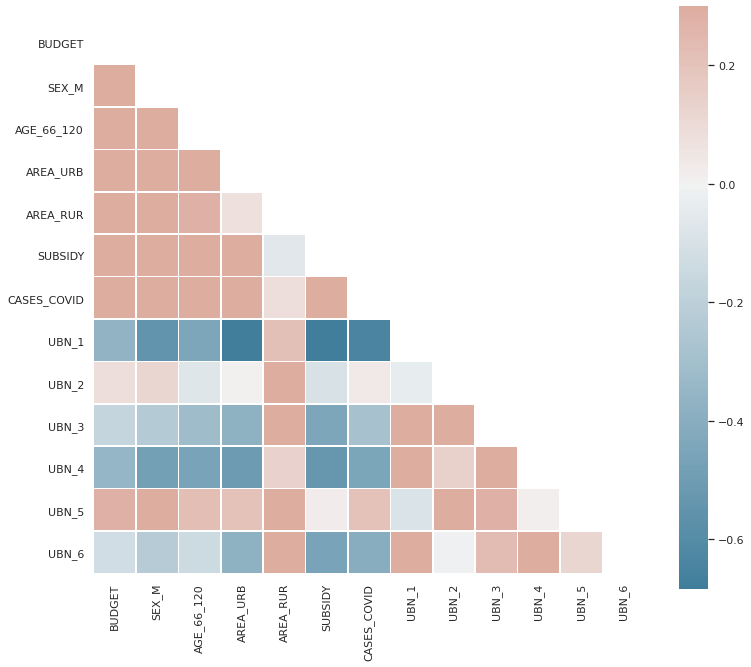

In [57]:
corr = data_trans.iloc[:,range(4,17)].corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 20))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


## K-means Clustering Analysis

In [58]:
kmeans_kwargs = {"init": "random","n_init": 10,"max_iter": 300,"random_state": 42}

In [59]:
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_trans.iloc[:,range(5,16)])
    sse.append(kmeans.inertia_)

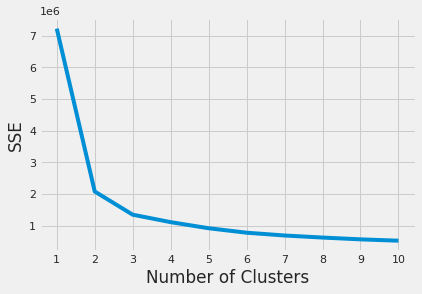

In [60]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [61]:
#build the K-Means model
kmeans = KMeans(n_clusters=3) # You want cluster the passenger records into 2: Survived or Not survived
kmeans.fit(data_trans.iloc[:,range(5,16)])

KMeans(n_clusters=3)

In [62]:
# Final locations of the centroid
group=kmeans.labels_
group

array([1, 0, 2, ..., 2, 1, 1], dtype=int32)

<AxesSubplot:xlabel='BUDGET', ylabel='UBN_6'>

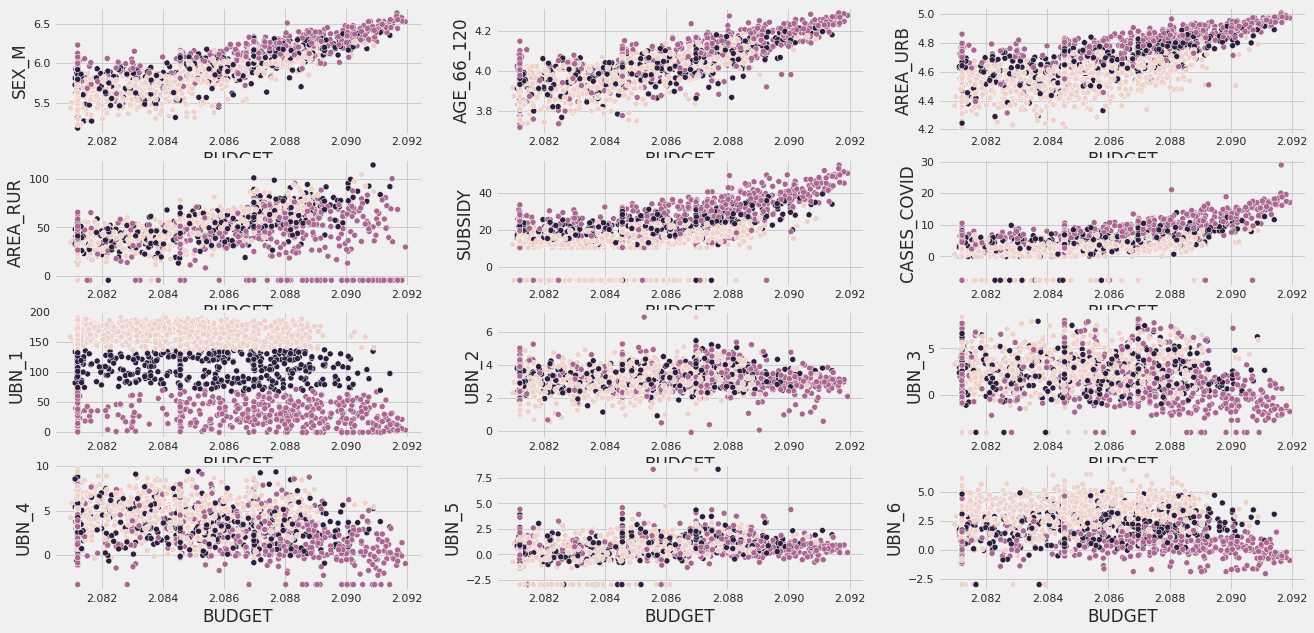

In [63]:
data_trans["GROUP"]=group

# scatter plots
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6),(ax7,ax8,ax9),(ax10,ax11,ax12)) = plt.subplots(4,3,figsize=(20,10))
sns.set_theme(style="whitegrid")

sns.scatterplot(data=data_trans, y="SEX_M", x="BUDGET", hue="GROUP", legend=False, ax=ax1)
sns.scatterplot(data=data_trans, y="AGE_66_120", x="BUDGET", hue="GROUP", legend=False,ax=ax2)
sns.scatterplot(data=data_trans, y="AREA_URB", x="BUDGET", hue="GROUP", legend=False,ax=ax3)
sns.scatterplot(data=data_trans, y="AREA_RUR", x="BUDGET", hue="GROUP", legend=False,ax=ax4)
sns.scatterplot(data=data_trans, y="SUBSIDY", x="BUDGET", hue="GROUP", legend=False,ax=ax5)
sns.scatterplot(data=data_trans, y="CASES_COVID", x="BUDGET", hue="GROUP", legend=False,ax=ax6)
sns.scatterplot(data=data_trans, y="UBN_1", x="BUDGET", hue="GROUP", legend=False,ax=ax7)
sns.scatterplot(data=data_trans, y="UBN_2", x="BUDGET", hue="GROUP", legend=False,ax=ax8)
sns.scatterplot(data=data_trans, y="UBN_3", x="BUDGET", hue="GROUP", legend=False,ax=ax9)
sns.scatterplot(data=data_trans, y="UBN_4", x="BUDGET", hue="GROUP", legend=False,ax=ax10)
sns.scatterplot(data=data_trans, y="UBN_5", x="BUDGET", hue="GROUP", legend=False,ax=ax11)
sns.scatterplot(data=data_trans, y="UBN_6", x="BUDGET", hue="GROUP", legend=False,ax=ax12)


In [64]:
df1=data_trans[data_trans['GROUP']==0]
df2=data_trans[data_trans['GROUP']==1]
df3=data_trans[data_trans['GROUP']==2]

In [65]:
print(len(df1),len(df2),len(df3))

967 457 447


In [136]:
# Model 1 group
# X1=df1.iloc[:,range(5,17)]
X1=df1[["SEX_M","AREA_URB","AREA_RUR","UBN_5"]]
X1 = sm.add_constant(X1)
# X1=df1.iloc[:,range(5,16)]
reg1=OLS(df1.iloc[:,4],X1).fit()
#reg1.summary()
coeff1=(reg1.params).T
pval1=(reg1.pvalues).T

# Model 2 group
# X2=df2.iloc[:,range(5,17)]
X2=df2[["SEX_M","AREA_URB","UBN_6"]]
X2 = sm.add_constant(X2)
# X2=df2.iloc[:,range(5,16)]
reg2=OLS(df2.iloc[:,4],X2).fit()
#reg2.summary()
coeff2=reg2.params
pval2=reg2.pvalues

# Model 3 group
# X3=df3.iloc[:,range(5,17)]
X3=df3[["SEX_M","AGE_66_120","AREA_RUR","SUBSIDY","CASES_COVID","UBN_6"]]
X3 = sm.add_constant(X3)
# X3=df3.iloc[:,range(5,16)]
reg3=OLS(df3.iloc[:,4],X3).fit()
# reg3.summary()
coeff3=reg3.params
pval3=reg3.pvalues

sum_mod=[coeff1,pval1,coeff2,pval2,coeff3,pval3]
sum_mod=pd.DataFrame(sum_mod)
sum_mod

,const,SEX_M,AREA_URB,AREA_RUR,UBN_5,UBN_6,AGE_66_120,SUBSIDY,CASES_COVID
0,2.053190,2.457818e-03,0.002833,7.967191e-05,-0.000086,NaN,NaN,NaN,NaN
1,0.000000,1.307680e-02,0.000548,5.311401e-14,0.079175,NaN,NaN,NaN,NaN
2,2.024298,1.421932e-02,-0.005168,NaN,NaN,0.000186,NaN,NaN,NaN
3,0.000000,1.524958e-33,0.011902,NaN,NaN,0.041582,NaN,NaN,NaN
4,2.038082,3.201037e-03,NaN,3.769681e-05,NaN,0.000208,0.006143,0.000038,0.000058
5,0.000000,2.437004e-03,NaN,1.300136e-05,NaN,0.006454,0.010085,0.047798,0.103536


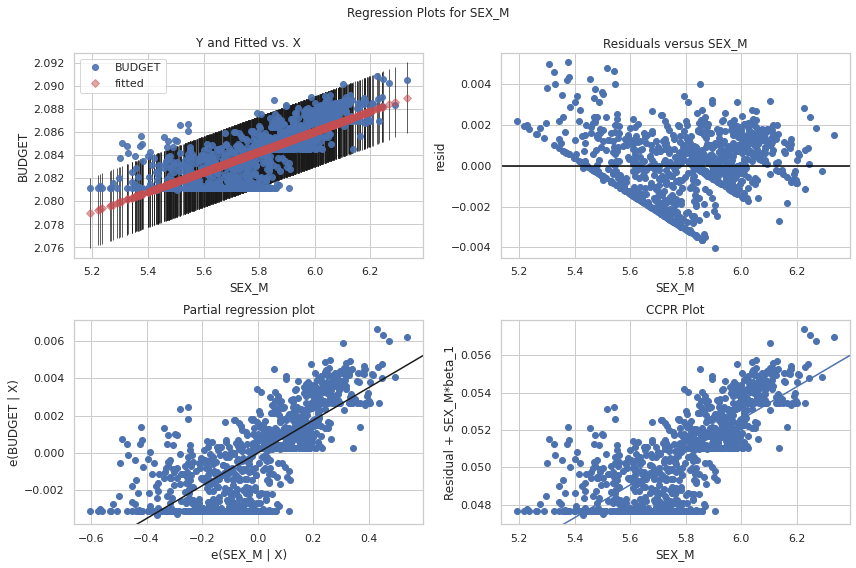

In [102]:
# Diagnostic Plots for OLS model to analyze the assumptions
results = smf.ols('BUDGET ~ SEX_M',data=df1).fit()
# X1 =X[:,1].tolist()
figure1 = plt.figure(figsize=(12, 8))
figure1 = sm.graphics.plot_regress_exog(results,'SEX_M', fig = figure1)
plt.show()


In [137]:
# Normality test
Statist1,P_val1=stats.normaltest(reg1.resid, axis=0, nan_policy='propagate') 
Statist2,P_val2=stats.normaltest(reg2.resid, axis=0, nan_policy='propagate') 
Statist3,P_val3=stats.normaltest(reg3.resid, axis=0, nan_policy='propagate') 
# print(round(Statist1,4),round(P_val1,4))
# print(round(Statist2,4),round(P_val2,4))
# print(round(Statist3,4),round(P_val3,4))

0.6405 0.726
24.2197 0.0
0.0112 0.9944


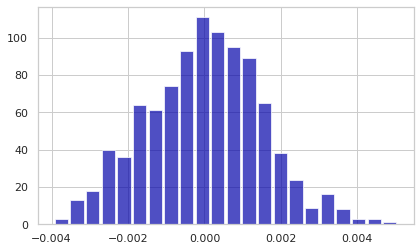

In [129]:
n, bins, patches = plt.hist(x=reg1.resid, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

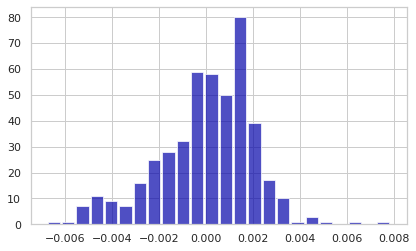

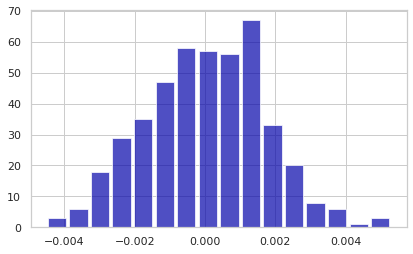

In [119]:
n, bins, patches = plt.hist(x=reg3.resid, bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)